### Stationarity Exercise

In [56]:
import pandas as pd
import numpy as np

In [69]:
# import matplotlib
import matplotlib.pyplot as plt

# import random
import random

# set a random seed
random.seed(5)

* generate a NON stationary time-series

In [70]:
random_squared = []
for i in range(0,100):
    n = random.randint(1,30)
    random_squared.append(i + n)

dates = pd.date_range('2022-01-01', periods=100)

In [71]:
non_stationary = pd.DataFrame({'Date': dates, 'Number': random_squared}).set_index('Date')
non_stationary.head()

,Number
Date,
2022-01-01,20
2022-01-02,10
2022-01-03,26
2022-01-04,15
2022-01-05,30


* plot the NON stationary series generated above

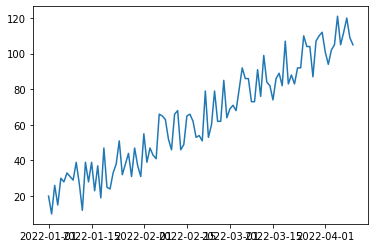

In [48]:
c

* generate a stationary time-series

In [49]:
randomlist = []
for i in range(0,100):
    n = random.randint(1,30)
    randomlist.append(n)

dates = pd.date_range('2022-01-01', periods=100)

In [50]:
stationary = pd.DataFrame({'Date': dates, 'Number': randomlist}).set_index('Date')
stationary.head()

,Number
Date,
2022-01-01,16
2022-01-02,16
2022-01-03,23
2022-01-04,6
2022-01-05,2


* plot the stationary series generated above

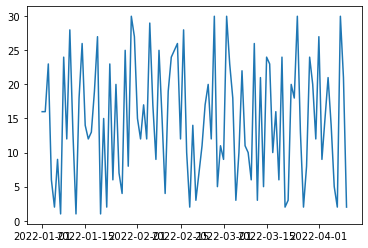

In [51]:
plt.plot(stationary)

* Create a function `'ADF_Stationarity_Test'` with the input parameters `timeseries` and `significance_level` which: 
    * prints the adfuller test results
    * prints the conclusion stating whether timeseries is stationary based on the siginificance level (input parameter of function)


In [52]:
from statsmodels.tsa.stattools import adfuller

def ADF_Stationarity_Test(timeseries, significance_level):
    X = timeseries.values
    result = adfuller(X)

    print('--ADF Test Result--')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
	    print('\t%s: %.3f' % (key, value))
    print()
    
    if result[1] <= significance_level:
        print(f'With a p-value of {result[1]} and a significance level of {significance_level}, the time series is stationary')
    else:
        print(f'With a p-value of {result[1]} and a significance level of {significance_level}, the time series is non-stationary')

* Apply the function `'ADF_Stationarity_Test'` to find out whether the timeseries generated above are stationary.

In [53]:
ADF_Stationarity_Test(stationary, 0.05)

--ADF Test Result--
ADF Statistic: -10.952781
p-value: 0.000000
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583

With a p-value of 8.712522521062806e-20 and a significance level of 0.05, the time series is stationary


In [54]:
ADF_Stationarity_Test(non_stationary, 0.05)

--ADF Test Result--
ADF Statistic: -0.038158
p-value: 0.955260
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583

With a p-value of 0.9552603791523991 and a significance level of 0.05, the time series is non-stationary


* Apply a suitable transformation to make the NON stationary time series stationary.

In [82]:
def difference(timeseries, interval=1):
	X = timeseries.values
	diff = list()
	for i in range(len(X)):
		value = X[i] - X[i - interval]
		diff.append(int(value))
	return diff

In [83]:
non_stationary_transform = non_stationary.copy()
non_stationary['Number'] = difference(non_stationary)

* plot the transformed time series

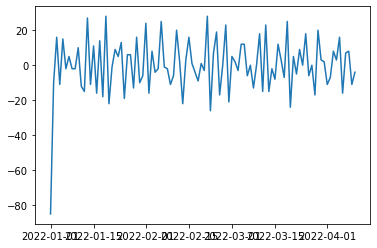

In [86]:
plt.plot(non_stationary)

* Apply the function `'ADF_Stationarity_Test'` to find out whether the transformed timeseries is stationary.

In [87]:
ADF_Stationarity_Test(non_stationary, 0.05)

--ADF Test Result--
ADF Statistic: -9.223736
p-value: 0.000000
Critical Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583

With a p-value of 1.7517251212360106e-15 and a significance level of 0.05, the time series is stationary
